In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [3]:
def findOutliers(arr):

	lower, med, upper = np.quantile(arr, [0.25, 0.5, 0.75])

	range = upper - lower
	min = lower - 1.5*range
	max = upper + 1.5*range

	"""print(f"L outlier: {min}")
	print(f"L        : {lower}")
	print(f"Median   : {med}")
	print(f"U        : {upper}")
	print(f"U outlier: {max}")"""

	# Find outliers
	outliers = np.where((arr < min) | (arr > max))[0]
		
	return list(outliers)

In [4]:
def removeOutliers(arr, location = -1):

	# Find outliers
	indices = []
	for i in range(len(arr) if location == -1 else 1):
		indices.extend(findOutliers(arr[i] if location == -1 else arr[location]))

	outliers = sorted(list(set(indices)), reverse = True)

	# Remove Outliers
	for i in range(len(arr)):
		arr[i] = np.delete(arr[i], outliers)

	# Return the good stuff
	return arr, outliers

In [10]:
def displayImages(filename, imageType, mins, maxes):
	# Display the image changes
	og = cv.imread(filename, cv.IMREAD_COLOR)[:, :, ::-1]
	converted = cv.imread(filename, cv.IMREAD_COLOR)[:, :, ::-1]
	if (imageType == 'hsv'):
		converted = cv.cvtColor(converted, cv.COLOR_RGB2HSV)

	for r in range(og.shape[0]):
		for c in range(og.shape[1]):
			for i in range(og.shape[2]):
				if (converted[r][c][i] < mins[i] or converted[r][c][i] > maxes[i]):
					converted[r, c] = [0, 255, 255] if imageType == 'hsv' else [255, 0, 0]

	if (imageType == 'hsv'):
		converted = cv.cvtColor(converted, cv.COLOR_HSV2RGB)

	plt.subplot(121);plt.imshow(og);plt.title("Original");
	plt.subplot(122);plt.imshow(converted);plt.title("Outliers");

In [6]:
def processImage(filename, imageType, shouldRemoveOutliers = False, outlierBase = -1, displayImage = False, displayOutput = False):
	finalImage = cv.imread(filename, cv.IMREAD_COLOR)[:, :, ::-1]

	# Change image type if needed
	if (imageType == 'hsv'):
		finalImage = cv.cvtColor(finalImage, cv.COLOR_RGB2HSV)

	# data
	data = [[] for _ in range(finalImage.shape[2])]

	# Separate the pixels into individual components
	for i in range(finalImage.shape[2]):
		data[i] = finalImage[:, :, i:(i + 1)]
		for _ in range(finalImage.shape[2] - 1):
			data[i] = data[i].flatten()

	# Remove Outliers
	if (shouldRemoveOutliers == True):
		data, outliers = removeOutliers(data, outlierBase)

		# Display the image changes
		if (displayImage == True):
			displayImages(filename, imageType, [np.min(data[i]) for i in range(finalImage.shape[2])], [np.max(data[i]) for i in range(finalImage.shape[2])])

	# Display the data
	if (displayOutput == True):
		for i in range(finalImage.shape[2]):
			print(f"{imageType[i].upper()} Min: {np.min(data[i])}")
			print(f"{imageType[i].upper()} Avg: {np.sum(data[i]) / len(data[i]):.1f}")
			print(f"{imageType[i].upper()} Med: {np.quantile(data[i], 0.5)}")
			print(f"{imageType[i].upper()} Max: {np.max(data[i])}")
			print()

	return data

[29, 28, 90]
[45, 255, 255]


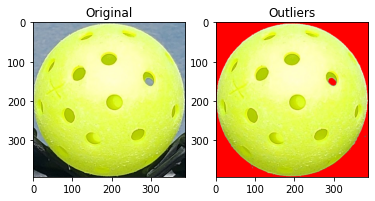

In [8]:
files = ['Inscribed/20220625_163243.jpg', 'Inscribed/20220625_163245.jpg', 'Inscribed/20220625_163247.jpg', 'Inscribed/20220625_163249.jpg', 'Inscribed/20220625_163251.jpg', 'Inscribed/20220625_163253.jpg', 'Inscribed/20220625_163255.jpg', 'Inscribed/20220625_163256.jpg', 'Inscribed/20220625_163258.jpg', 'Inscribed/20220625_163300.jpg', 'Inscribed/20220625_163301.jpg', 'Inscribed/20220625_163315.jpg', 'Inscribed/20220625_163317.jpg', 'Inscribed/20220625_163319.jpg', 'Inscribed/20220625_163321.jpg', 'Inscribed/20220625_163322.jpg', 'Inscribed/20220625_163324.jpg', 'Inscribed/20220625_163326.jpg', 'Inscribed/20220625_163327.jpg', 'Inscribed/20220625_163329.jpg', 'Inscribed/20220625_163332.jpg', 'Inscribed/20220625_163333.jpg', 'Inscribed/20220625_163335.jpg', 'Inscribed/20220625_163338.jpg', 'Inscribed/20220625_163358.jpg', 'Inscribed/20220625_163401.jpg', 'Inscribed/20220625_163403.jpg', 'Inscribed/20220625_163405.jpg', 'Inscribed/20220625_163407.jpg', 'Inscribed/20220625_163410.jpg', 'Inscribed/20220625_163414.jpg', 'Inscribed/20220625_163416.jpg', 'Inscribed/20220625_163418.jpg', 'Inscribed/20220625_163420.jpg', 'Inscribed/20220625_163422.jpg', 'Inscribed/20220625_163424.jpg', 'Inscribed/20220625_163427.jpg', 'Inscribed/20220625_163430.jpg', 'Inscribed/20220625_163438.jpg', 'Inscribed/20220625_163548.jpg', 'Inscribed/20220625_163552.jpg', 'Inscribed/20220625_163602.jpg', 'Inscribed/20220625_163605.jpg', 'Inscribed/20220625_163607.jpg', 'Inscribed/20220625_163609.jpg', 'Inscribed/20220625_163611.jpg', 'Inscribed/20220625_163613.jpg', 'Inscribed/20220625_163615.jpg']
info = processImage(files[0].replace('Inscribed', 'Outscribed'), 'hsv', True, displayImage=True)

In [13]:
# Parameters
imageType = 'hsv'
removeOutliersFromIndividualImages = False
removeOutliersFromAllImages = True
folderName = 'Inscribed'

data = [[] for _ in range(3)]

for filename in os.listdir(f'{folderName}/'):
    f = os.path.join(f'{folderName}/', filename)
    # checking if it is a file
    if os.path.isfile(f):
        if (os.path.splitext(f)[1] == '.jpg'):
            info = processImage(f, imageType, removeOutliersFromIndividualImages)
            for i in range(len(info)):
                data[i].extend(info[i])

# Remove Outliers accross all images
if (removeOutliersFromAllImages == True):
    data, outliers = removeOutliers(data)

for i in range(len(imageType)):
    print(f"{imageType[i].upper()} Min: {np.min(data[i])}")
    print(f"{imageType[i].upper()} Avg: {np.sum(data[i]) / len(data[i]):.1f}")
    print(f"{imageType[i].upper()} Med: {np.quantile(data[i], 0.5)}")
    print(f"{imageType[i].upper()} Max: {np.max(data[i])}")
    print()

H Min: 27
H Avg: 32.4
H Med: 33.0
H Max: 38

S Min: 2
S Avg: 121.3
S Med: 126.0
S Max: 255

V Min: 228
V Avg: 251.3
V Med: 255.0
V Max: 255



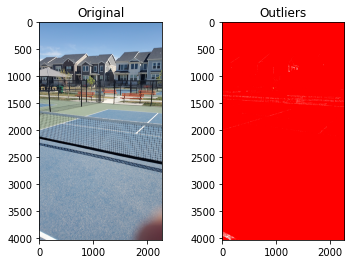

In [16]:
# False, True
displayImages(files[32].replace('Inscribed', 'Finished'), 'hsv', [27, 2, 228], [38, 255, 255])